# London bike sharing Data Analysis & Visualization Projects

## Table of Contents
1. Introduction
2. Importing Data
3. Understanding Data
4. Cleaning/Transforming Date Column(s)
5. Data Visualization
6. Distribution analysis
7. Outliers
8. Correlations
9. Conclusion

### Introduction

In order to reduce traffic congestion and air pollution in London, the government encourages people to use shared bicycles. This demand for shared bicycles is influenced by several factors. Factors such as air temperature, humidity, wind, whether it is a holiday or weekend and the season are all important. In this study, the determinants of cycling demand in London are analyzed in order to shed some light on the determinants of cycling demand for company officials and policy makers.

### Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Ldf = pd.read_csv(r'C:\Users\Admin\Documents\New folder\DA_Projects\Data Analyst Portfolio\P_3. Data visualization\london_merged.csv')

Ldf.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### Understanding Data

In [3]:
Ldf.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [4]:
Ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
# Checking duplicates
Ldf.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17409    False
17410    False
17411    False
17412    False
17413    False
Length: 17414, dtype: bool

In [6]:
# Checking null values by column
Ldf.isnull().any()

timestamp       False
cnt             False
t1              False
t2              False
hum             False
wind_speed      False
weather_code    False
is_holiday      False
is_weekend      False
season          False
dtype: bool

### Cleaning/Transforming Date Column(s)

In [7]:
# rename columns
Ldf.rename(columns={'cnt': 'bike_count',
                        't1': 'real_temp',
                        't2': 'feels_like_temp',
                        'hum': 'humidity'},
                       inplace=True)

* Categorical variables such as "weathercode", "haliday", "weekend" and "season" have float64 data type. 
* Before starting the analyses, we want to transform them into categorical (object) variables.

* Weather_code column

In [8]:
Ldf['weather_code'].value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

In [9]:
# Changing Weather Codes values from numeric to object for the better analysis
Ldf['weather_code'].replace(1, 'Clear', inplace=True)
Ldf['weather_code'].replace(2, 'scattered clouds', inplace=True)
Ldf['weather_code'].replace(3, 'Broken clouds', inplace=True)
Ldf['weather_code'].replace(4, 'Cloudy', inplace=True)
Ldf['weather_code'].replace(7, 'Rain', inplace=True)
Ldf['weather_code'].replace(10, 'rain with thunderstorm', inplace=True)
Ldf['weather_code'].replace(26, 'snowfall', inplace=True)

Ldf.head(5)

,timestamp,bike_count,real_temp,feels_like_temp,humidity,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,0.0,1.0,3.0


* is_holiday column

In [10]:
Ldf['is_holiday'].value_counts()

0.0    17030
1.0      384
Name: is_holiday, dtype: int64

In [11]:
Ldf['is_holiday'].replace(1, 'Holiday', inplace=True)
Ldf['is_holiday'].replace(0, 'Non-holiday', inplace=True)

Ldf.head(2)

,timestamp,bike_count,real_temp,feels_like_temp,humidity,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,Non-holiday,1.0,3.0


* is_weekend

In [12]:
Ldf['is_weekend'].value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

In [13]:
Ldf['is_weekend'].replace(1, 'Weekend', inplace=True)
Ldf['is_weekend'].replace(0, 'Non-weekend', inplace=True)

Ldf.head(2)

,timestamp,bike_count,real_temp,feels_like_temp,humidity,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,Non-holiday,Weekend,3.0


In [14]:
Ldf['is_weekend'].value_counts()

Non-weekend    12444
Weekend         4970
Name: is_weekend, dtype: int64

* season

In [15]:
Ldf['season'].value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

In [17]:
# Season
Ldf['season'].replace(0, 'Spring', inplace=True)
Ldf['season'].replace(1, 'Summer', inplace=True)
Ldf['season'].replace(2, 'Fall', inplace=True)
Ldf['season'].replace(3, 'Winter', inplace=True)

Ldf.sample(5)

,timestamp,bike_count,real_temp,feels_like_temp,humidity,wind_speed,weather_code,is_holiday,is_weekend,season
14465,2016-09-01 12:00:00,1723,21.0,21.0,51.5,14.0,scattered clouds,Non-holiday,Non-weekend,Fall
228,2015-01-13 13:00:00,719,9.0,5.5,73.5,27.5,Rain,Non-holiday,Non-weekend,Winter
10039,2016-02-28 12:00:00,1330,7.0,3.0,51.5,28.0,Broken clouds,Non-holiday,Weekend,Winter
2912,2015-05-05 16:00:00,1599,16.0,16.0,46.5,42.5,scattered clouds,Non-holiday,Non-weekend,Spring
15096,2016-09-29 08:00:00,4775,18.5,18.5,80.5,24.0,Broken clouds,Non-holiday,Non-weekend,Fall


#### timestampt column
* "timestamp" is in object form. I'm going to change it to "datetime" for excracting day and month infos.

In [18]:
Ldf['date'] = pd.to_datetime(Ldf['timestamp'])

print(Ldf['date'].dtype)
Ldf.head(2)

datetime64[ns]


,timestamp,bike_count,real_temp,feels_like_temp,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,date
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,Winter,2015-01-04 00:00:00
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,Non-holiday,Weekend,Winter,2015-01-04 01:00:00


In [19]:
# Now exctarcting the day and month names from `date` column.

Ldf['day'] = Ldf['date'].dt.day_name()
Ldf['month'] = Ldf['date'].dt.month_name()
Ldf['hour'] = Ldf['date'].apply(lambda x: x.hour) 

Ldf.head(5)

,timestamp,bike_count,real_temp,feels_like_temp,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,date,day,month,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,Winter,2015-01-04 00:00:00,Sunday,January,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,Non-holiday,Weekend,Winter,2015-01-04 01:00:00,Sunday,January,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,Non-holiday,Weekend,Winter,2015-01-04 02:00:00,Sunday,January,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,Non-holiday,Weekend,Winter,2015-01-04 03:00:00,Sunday,January,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,Non-holiday,Weekend,Winter,2015-01-04 04:00:00,Sunday,January,4


## Data Visualization

### Bike sharing by days

[Text(0.5, 1.0, 'Daily distribution of bike demand')]

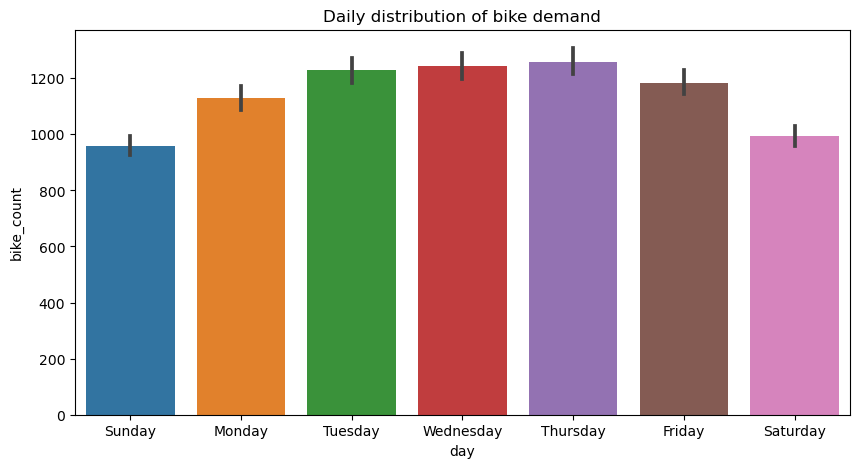

In [20]:
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(data=Ldf, x='day', y='bike_count')
ax.set(title='Daily distribution of bike demand')

* Bike sharing is higher on Tuesday, Wednesday and Thursdays.

### Bike sharing by months

Text(0.5, 1.0, 'Monthly distribution of bike demand')

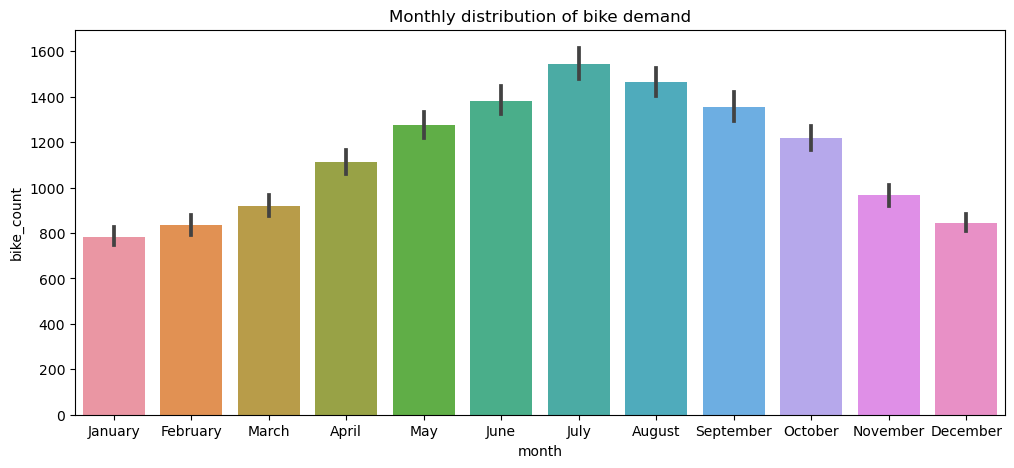

In [21]:
fig,ax = plt.subplots(figsize=(12,5))
sns.barplot(data=Ldf, x='month', y='bike_count')
ax.set_title("Monthly distribution of bike demand")

* Bike sharing is higher in summerthen winter

### Bike sharing by weather

Text(0.5, 1.0, 'Bike usage by Wether')

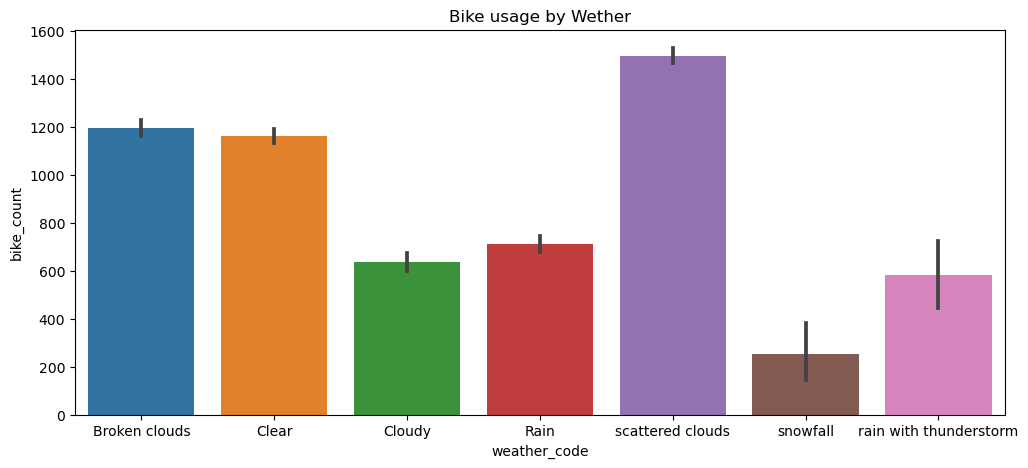

In [22]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(data=Ldf, x='weather_code', y='bike_count')
ax.set_title('Bike usage by Wether')

* Bikes usages is higher in scattered sclouds weather & lower in snowfall weather

### Bike sharing by holiday

Text(0.5, 1.0, 'Bike Usage by Holidays')

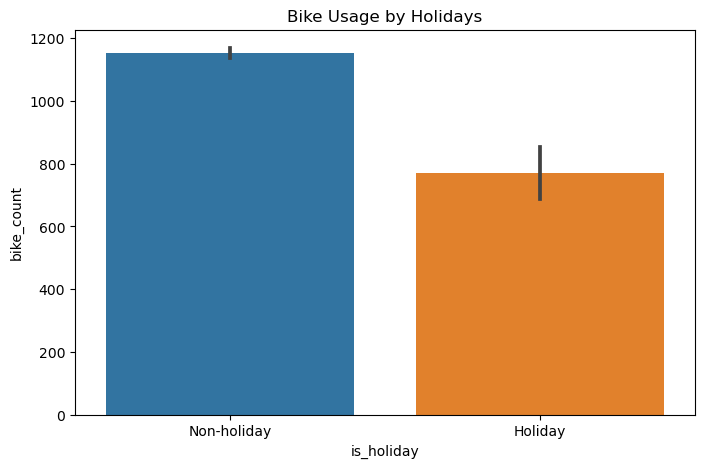

In [23]:
fix, ax = plt.subplots(figsize=(8,5))
sns.barplot(data=Ldf, x='is_holiday', y='bike_count')
ax.set_title('Bike Usage by Holidays')

* Bike usage is higher in Non_holiday then holiday

### Bike sharing by weekend

Text(0.5, 1.0, 'Bike Usage by week')

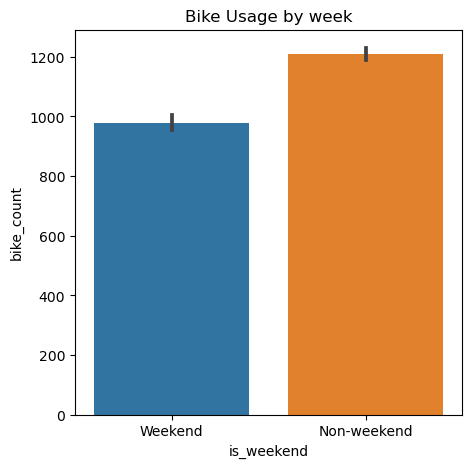

In [24]:
fig,ax=plt.subplots(figsize=(5,5))
sns.barplot(data=Ldf, x='is_weekend', y='bike_count')
ax.set_title('Bike Usage by week')

### Bike sharing by season

Text(0.5, 1.0, 'Bike usage by Season')

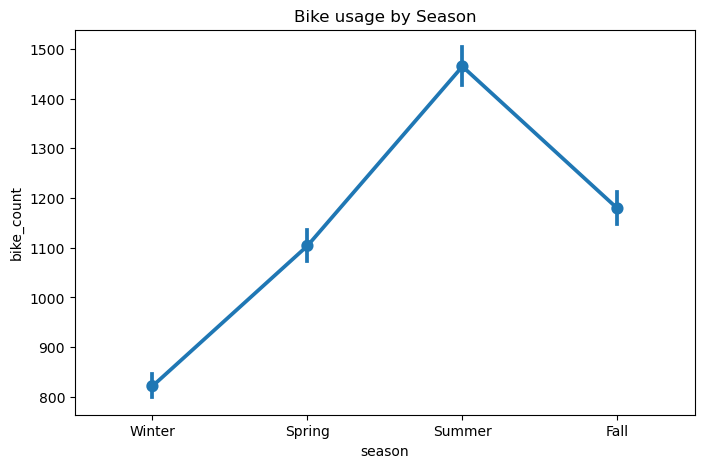

In [26]:
fig,ax=plt.subplots(figsize=(8,5))
sns.pointplot(data=Ldf, x='season', y='bike_count')
ax.set_title('Bike usage by Season')

### Bike usage by Hour in Different Season

Text(0.5, 1.0, 'Bike usage by Hour in Different Season')

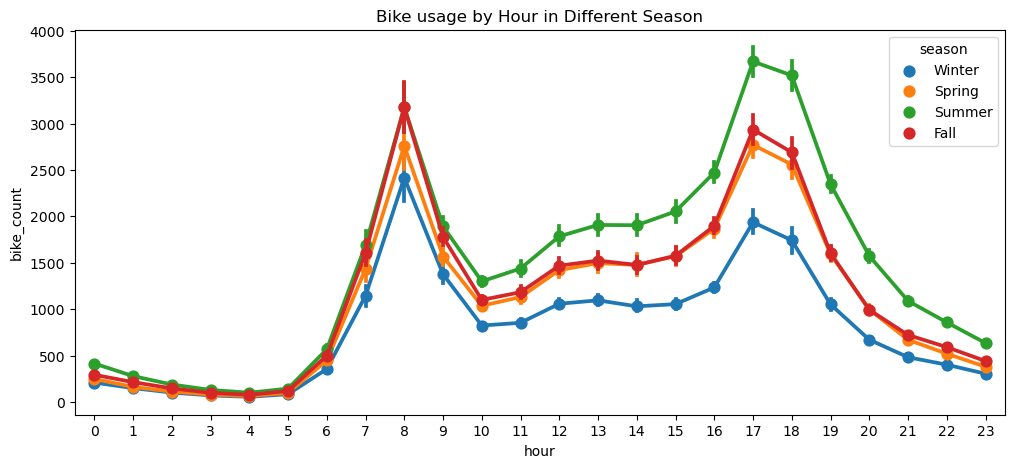

In [27]:
fig,ax=plt.subplots(figsize=(12,5))
sns.pointplot(data=Ldf, x='hour', y='bike_count', hue='season', ax=ax)
ax.set_title('Bike usage by Hour in Different Season')

## Distribution analyses with Object Oriented Method

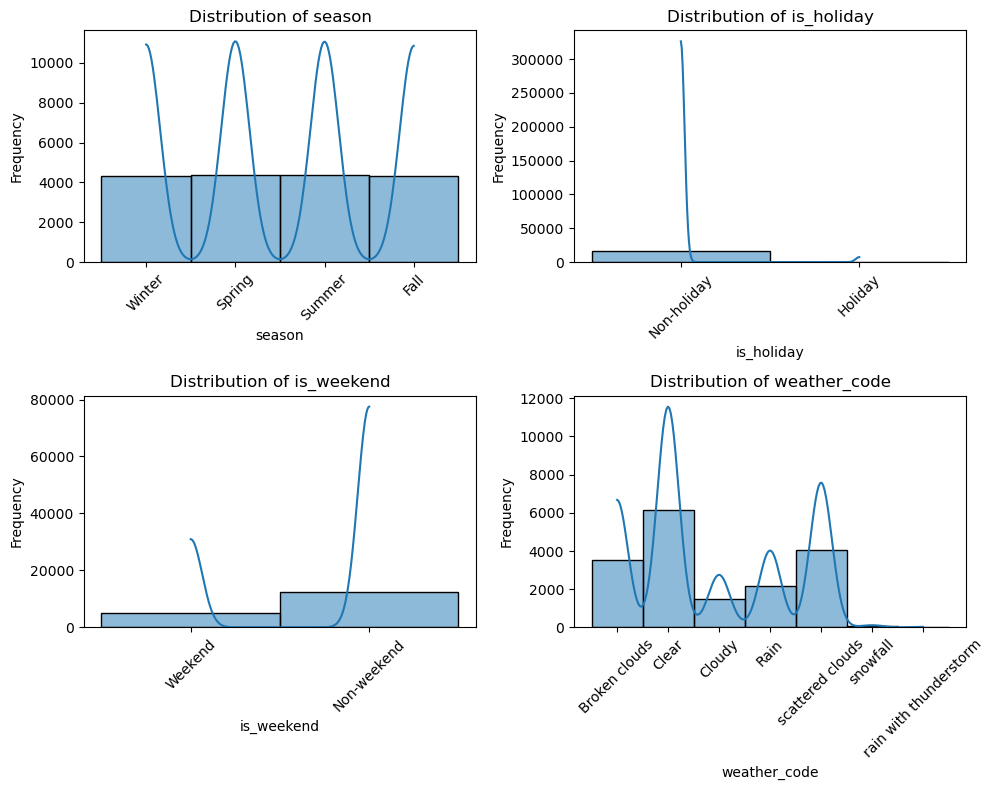

In [29]:
df_discrete = ["season", "is_holiday", "is_weekend", "weather_code"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
fig.tight_layout()

for i, ax in enumerate(axes.flat):
    feature = df_discrete[i]
    
    # Create a histogram for each feature
    sns.histplot(data=Ldf, x=feature, kde=True, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.set_title('Distribution of ' + feature)
    
    # If it is necessary; Rotate x-axis 
    ax.tick_params(axis='x', rotation=45)
    
fig.tight_layout()
plt.show()

## Outliers for 'real_temp','wind_speed', 'humidity'

<AxesSubplot:>

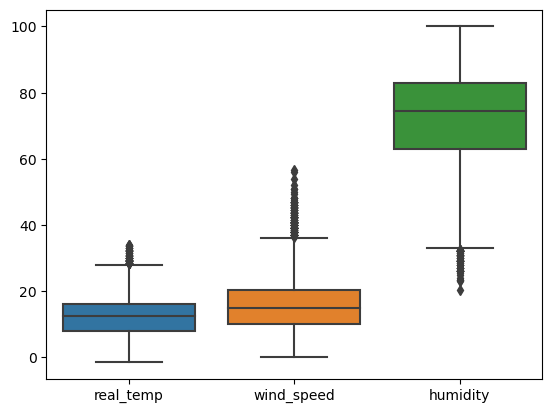

In [30]:
# detect outliers using boxplot
fig,ax = plt.subplots()
sns.boxplot(data=Ldf[['real_temp','wind_speed', 'humidity']])

## Correlation

In [31]:
Ldf.corr()

,bike_count,real_temp,feels_like_temp,humidity,wind_speed,hour
bike_count,1.000000,0.388798,0.369035,-0.462901,0.116295,0.324423
real_temp,0.388798,1.000000,0.988344,-0.447781,0.145471,0.168708
feels_like_temp,0.369035,0.988344,1.000000,-0.403495,0.088409,0.153956
humidity,-0.462901,-0.447781,-0.403495,1.000000,-0.287789,-0.295653
wind_speed,0.116295,0.145471,0.088409,-0.287789,1.000000,0.141792
hour,0.324423,0.168708,0.153956,-0.295653,0.141792,1.000000


## Conclusion

**Insight:** People rent bicycles most often on days when the weather is "clear". In second place are the days with "scatter clouds" and in third place are the days with "broken clouds". Interestingly, more bicycles are rented on "rainy" days than on "cloudy" days. On snowy and stormy days, bicycle hire is around zero.
* Demand for bicycle hire is higher on working days and on days with clear weather.